## Objective Function:

Maximizing the revenue, given as the difference between the reward (profit) and the cost per click times the clicks ( costs ). 

It can be expressed as :
### $$ max_{price,bid}( \sum \limits_{C_i} (price \times soldItems(bid_i, price)) - (clicks(bid_i) \times costPerClick(bid_i))) $$


with the following constraints:
$$ price >= 3  $$
$$ price <= 15  $$
$$ 0 < bid_i < 10  \hspace{5mm} \forall i $$
$$ bid - \sum(costPerClicks) <= dailyBudget  $$


The last constraint is not needed due to the missing of a limited budget. 
    




### Customer Classes  ids :
 
    - Class 0  =  Wealthy and frequent buyer 
    - Class 1  =  Wealthy and not frequent  
    - Class 2  =  Frequent, but "smart"


In [1]:
from customerManager import CustomerManager
customer_path = "./config/customer_classes.json"
cManager = CustomerManager(file_path = customer_path)

115.18863160567165

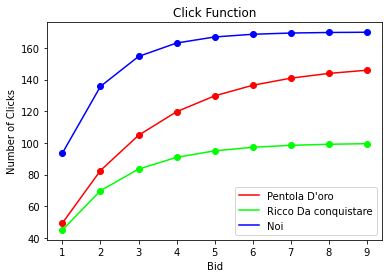

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#Data Generation
X = np.arange(1,10)
Y = []
for c in cManager.classes:
    Y.append([])
    for x in X:
        Y[c["class_id"]].append(cManager.clicks(c["class_id"], bid = x, noise = False)) 


#Plotting of click function
plt.figure()
colors = [[1,0,0] , [0,1,0 ], [0,0,1]]
for c in cManager.classes:    
    plt.plot(X, Y[c["class_id"]], color=colors[c["class_id"]], label = c["name"])
    
    plt.scatter(X, Y[c["class_id"]], color=colors[c["class_id"]])
    plt.title("Click Function")
    plt.xlabel("Bid")
    plt.ylabel("Number of Clicks")


plt.legend()
plt.show()


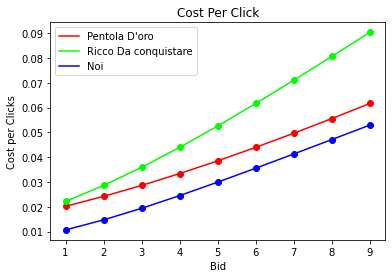

In [3]:
import matplotlib.pyplot as plt
import numpy as np


#Data Generation
X = np.arange(1, 10)
Y = []
for c in cManager.classes:
    Y.append([])
    for x in X:
        Y[c["class_id"]].append(cManager.cost_per_click(c["class_id"], bid = x, noise = False)) 


#Plotting 
plt.figure()
colors = [[1,0,0] , [0,1,0 ], [0,0,1]]
for c in cManager.classes:    
    plt.plot(X, Y[c["class_id"]], color=colors[c["class_id"]], label = c["name"])
    
    plt.scatter(X, Y[c["class_id"]], color=colors[c["class_id"]])
    plt.title("Cost Per Click")
    plt.xlabel("Bid")
    plt.ylabel("Cost per Clicks")


plt.legend()
plt.show()

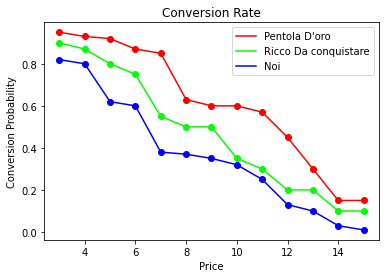

In [4]:
import matplotlib.pyplot as plt
import numpy as np


#Plotting 
plt.figure()
colors = [[1,0,0] , [0,1,0 ], [0,0,1]]
for c in cManager.classes:    
    plt.plot([i[0] for i in c["conversion_rate_matrix"]],
             [i[1] for i in c["conversion_rate_matrix"]], 
             color=colors[c["class_id"]], label = c["name"])
    
    plt.scatter([i[0] for i in c["conversion_rate_matrix"]],
                [i[1] for i in c["conversion_rate_matrix"]],
                color=colors[c["class_id"]])
    plt.title("Conversion Rate")
    plt.xlabel("Price")
    plt.ylabel("Conversion Probability")


plt.legend()
plt.show()

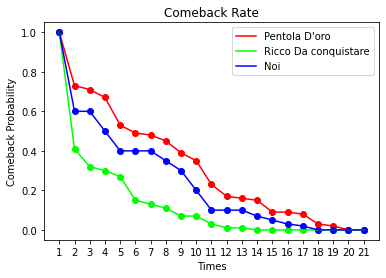

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
colors = [[1,0,0] , [0,1,0 ], [0,0,1]]

X = np.arange(1, 22)
Y = []


#Data Generation
for c in cManager.classes:
    Y.append([])
    for x in X:
        Y[c["class_id"]].append(cManager.comeback_probability(c["class_id"], times = x, noise = False)) 



#Plotting 
for c in cManager.classes:    
    plt.xticks(X)
    plt.plot(X,
             Y[c["class_id"]], 
             color=colors[c["class_id"]], label = c["name"])
    
    plt.scatter(X,
                Y[c["class_id"]], 
                color=colors[c["class_id"]])
    plt.title("Comeback Rate")
    plt.xlabel("Times")
    plt.ylabel("Comeback Probability")


plt.legend()
plt.show()


### First step

In the following step we are going to find the best joint (bid, pricing) using the implementation of Non Linear Programming optimization Algorithm provided by the Scipy Library

In [1]:
from customerManager import CustomerManager
customer_path = "./config/customer_classes.json"
cManager = CustomerManager(file_path = customer_path)

In [3]:
X0 = []
for i in range(1,8):
    n = float(i)
    if i >= 10:
        n = 9.0
    X0.append([n,n,n,float(i+3)])
X0

[[1.0, 1.0, 1.0, 4.0],
 [2.0, 2.0, 2.0, 5.0],
 [3.0, 3.0, 3.0, 6.0],
 [4.0, 4.0, 4.0, 7.0],
 [5.0, 5.0, 5.0, 8.0],
 [6.0, 6.0, 6.0, 9.0],
 [7.0, 7.0, 7.0, 10.0]]

In [9]:
import numpy as np
import scipy.optimize as opt

count = 0
def objective(x):   
    global count    
    count = count + 1

    #Checks bound of bid 
    res = 0.0
    price = x[3]
    for i in range(3):
        if x[i] < 1 or x[i] > 10 : return 0.0 
    
    for c in cManager.classes : 
        c_id = c["class_id"]
        bid = x[c_id]
        res += (price * cManager.sold_items(class_id = c_id, bid = bid, price = price, noise=False)) - \
              (cManager.cost_per_click(class_id=c_id, bid = bid, noise=False) * cManager.clicks(class_id = c_id, bid = bid,noise=False))
    return -res



# optimize
b_p = (3.0,15.0)
b_b = (1.0 , 10.0)
bnds = (b_b, b_b, b_b, b_p)

methods_with_jac = ['Nelder-Mead','Powell','CG','BFGS','Newton-CG','L-BFGS-B','TNC','COBYLA','SLSQP','trust-constr','dogleg','trust-ncg','trust-krylov','trust-exact']
methods = ['Nelder-Mead','Powell','CG','BFGS','L-BFGS-B','TNC','COBYLA','SLSQP','trust-constr']

max_value = 0
best_method = 'none'
best_x = None

In [13]:


# initial guesses
n = 4
x0 = np.zeros(n)
x0[0] = 5.0    #Bid_class0
x0[1] = 5.0    #Bid_class1
x0[2] = 5.0    #Bid_class2
x0[3] = 7.5    #Price



# show initial objective
'''
for x0 in X0:
    print('Initial SSE Objective: ' + str(objective(x0)))
    print(x0)
'''
for m in methods:
    print("Start with " + m)
    count = 0
    solution = opt.minimize(objective, x0, method = m,  bounds = bnds) 
    x = solution.x
    '''
    print('Final SSE Objective: ' + str(-objective(x)))
    print('Objective function runned : ' + str(count))
    # print solution
    print('Solution')
    print('x1 = ' + str(x[0]))
    print('x2 = ' + str(x[1]))
    print('x3 = ' + str(x[2]))
    print('x4 = ' + str(x[3]))
    '''
    if max_value < -objective(x):
        max_value = -objective(x)
        best_method = m
        best_x = x

print("Best method is " + best_method + " with a value of " + str(max_value))
print('Solution')
print('x1 = ' + str(best_x[0]))
print('x2 = ' + str(best_x[1]))
print('x3 = ' + str(best_x[2]))
print('x4 = ' + str(best_x[3]))


Start with Nelder-Mead
Start with Powell
Start with CG
Start with BFGS
Start with L-BFGS-B
Start with TNC
Start with COBYLA
Start with SLSQP
/home/gabriele/.local/lib/python3.8/site-packages/scipy/optimize/_minimize.py:535: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,
/home/gabriele/.local/lib/python3.8/site-packages/scipy/optimize/_minimize.py:535: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,
/home/gabriele/.local/lib/python3.8/site-packages/scipy/optimize/_minimize.py:535: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,
/home/gabriele/.local/lib/python3.8/site-packages/scipy/optimize/_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
Start with trust-con